In [3]:
## Ridge Regression
import numpy as np
import matplotlib.pyplot as plt

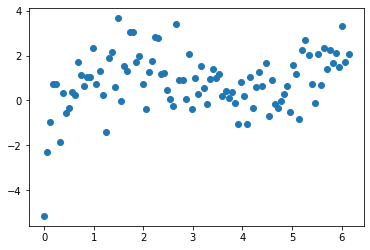

In [4]:
np.random.seed(0)
x = np.linspace(0.001,6.14,100)
y = np.sin(x) + np.log(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

### Fitting multiple models to this data

1. Linear Regression: $y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4 + \beta_5x^5 + \beta_6x^6 + \beta_7x^7$
2. Ridge Regression with the same features: $[1, x, x^2, x^3, x^4, x^5, x^6, x^7]$

In [6]:
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)

In [8]:
X = poly_power(x,7)

In [9]:
beta_ols = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
n = len(x)
lamdba1 = 0.001
beta_ridge = np.linalg.inv(X.T.dot(X) + n*lamdba1*np.eye(X.shape[1])).dot(X.T.dot(y))

In [10]:
beta_ols

array([-4.84626347e+00,  1.81232701e+01, -2.36257426e+01,  1.63809094e+01,
       -6.25432350e+00,  1.30806642e+00, -1.40350808e-01,  6.04465677e-03])

In [11]:
beta_ridge

array([-3.12267077e+00,  5.96056747e+00, -1.40685517e+00, -1.14946523e+00,
        8.09747196e-01, -2.14538444e-01,  2.67565560e-02, -1.29214973e-03])

In [12]:
xpred = np.linspace(0,6.14,200)
Xp = poly_power(xpred,n = 7)
yp_ols = Xp.dot(beta_ols)

In [13]:
yp_ridge = Xp.dot(beta_ridge)

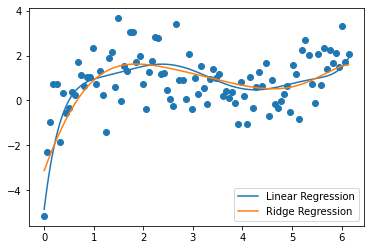

In [14]:
plt.plot(xpred,yp_ols,label = 'Linear Regression')
plt.plot(xpred,yp_ridge,label = 'Ridge Regression')
plt.scatter(x,y_noisy)
plt.legend()
plt.show()